# Data Augmentation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
train_gen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    )

train_generator = train_gen.flow_from_directory(
    "/content/alzheimers_dataset/train",
    target_size=(150,150),
    batch_size = 32,
    class_mode='categorical'
)

Found 4056 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'MildDemented': 0, 'NonDemented': 1, 'VeryMildDemented': 2}

In [8]:
test_gen = ImageDataGenerator(rescale=1.0/255,)

test_generator = test_gen.flow_from_directory(
    "/content/alzheimers_dataset/test",
    target_size=(150,150),
    batch_size = 32,
    class_mode='categorical'
)

Found 1013 images belonging to 3 classes.


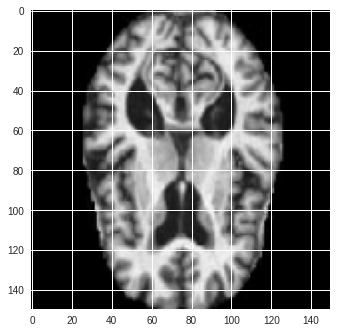

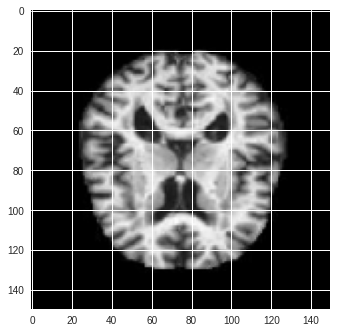

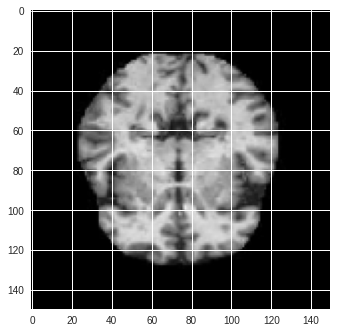

In [9]:
x,y = train_generator.next()
for i in range(3):
    plt.style.use("seaborn")
    plt.imshow(x[i])
    plt.show()

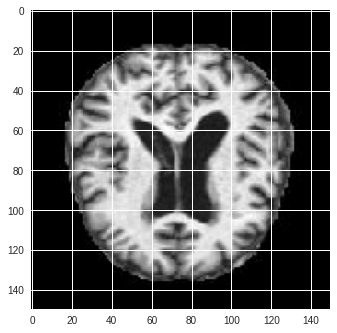

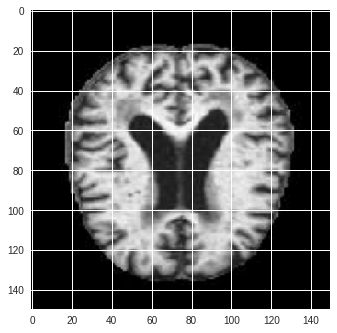

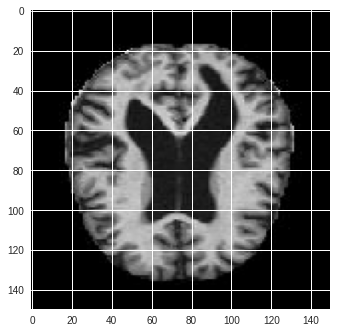

In [10]:
x,y = test_generator.next()
for i in range(3):
    plt.style.use("seaborn")
    plt.imshow(x[i])
    plt.show()

# CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import *

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 35, 35, 64)       

In [0]:
from keras.callbacks import ModelCheckpoint

In [17]:
checkpoint = ModelCheckpoint("alzheimers_model.hdf5",monitor='loss',save_best_only=True)

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 100,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/100
127/127 [==============================] - 25s 199ms/step - loss: 0.6620 - accuracy: 0.6538 - val_loss: 0.5466 - val_accuracy: 0.5962
Epoch 2/100
127/127 [==============================] - 25s 197ms/step - loss: 0.6399 - accuracy: 0.6632 - val_loss: 0.8957 - val_accuracy: 0.6022
Epoch 3/100
127/127 [==============================] - 25s 197ms/step - loss: 0.6290 - accuracy: 0.6820 - val_loss: 0.6068 - val_accuracy: 0.5735
Epoch 4/100
127/127 [==============================] - 25s 199ms/step - loss: 0.6289 - accuracy: 0.6933 - val_loss: 0.5625 - val_accuracy: 0.6051
Epoch 5/100
127/127 [==============================] - 25s 200ms/step - loss: 0.6100 - accuracy: 0.7002 - val_loss: 0.8268 - val_accuracy: 0.6219
Epoch 6/100
127/127 [==============================] - 25s 199ms/step - loss: 0.6186 - accuracy: 0.7036 - val_loss: 0.9964 - val_accuracy: 0.5696
Epoch 7/100
127/127 [==============================] - 25s 199ms/step - loss: 0.6065 - accuracy: 0.7051 - val_loss: 1.0209 -

KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model
from keras.optimizers import Adam 

In [0]:
model = load_model("alzheimers_model.hdf5")

In [0]:
adam = Adam(learning_rate=1e-6)

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
checkpoint2 = ModelCheckpoint("alzheimers_model.hdf5",monitor='val_acc',save_best_only=True)

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 50,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint2]
)

Epoch 1/50
127/127 [==============================] - 24s 191ms/step - loss: 0.2154 - accuracy: 0.9125 - val_loss: 0.9190 - val_accuracy: 0.7680
Epoch 2/50
  2/127 [..............................] - ETA: 11s - loss: 0.1928 - accuracy: 0.9375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


127/127 [==============================] - 24s 188ms/step - loss: 0.2042 - accuracy: 0.9152 - val_loss: 0.1997 - val_accuracy: 0.7670
Epoch 3/50
127/127 [==============================] - 24s 188ms/step - loss: 0.2184 - accuracy: 0.9100 - val_loss: 0.9412 - val_accuracy: 0.7572
Epoch 4/50
127/127 [==============================] - 24s 189ms/step - loss: 0.2027 - accuracy: 0.9199 - val_loss: 0.3042 - val_accuracy: 0.7690
Epoch 5/50
127/127 [==============================] - 24s 188ms/step - loss: 0.1947 - accuracy: 0.9228 - val_loss: 0.4797 - val_accuracy: 0.7522
Epoch 6/50
127/127 [==============================] - 24s 189ms/step - loss: 0.1902 - accuracy: 0.9241 - val_loss: 0.4313 - val_accuracy: 0.7670
Epoch 7/50
127/127 [==============================] - 24s 188ms/step - loss: 0.1882 - accuracy: 0.9290 - val_loss: 0.7543 - val_accuracy: 0.7848
Epoch 8/50
127/127 [==============================] - 24s 187ms/step - loss: 0.1858 - accuracy: 0.9280 - val_loss: 1.1600 - val_accuracy: 0.7